# Gas consumption from individual buildings in France

# Contents<a id='Contents'></a>

* [1 Introduction](#1_Introduction)
* [2 Imports](#2_Imports)
* [3 Files](#3_Files)
* [4 Columns](#4_Columns)
* [5 Explore the Data](#5_Explore_the_Data)
    * [5.1 Gas consumption across the country](#5.1_across_country)       
    * [5.2 Gas consumption in the four most populated cities](#5.2_populated_cities)    
    * [5.3 Mean consumption of each city](#5.3_each_city)
    * [5.4 Consumption in relation to the building type](#5.4_building_type)
    * [5.5 Consumption in relation to the number of floors](#5.5_number_floors)    
    * [5.6 Consumption in relation to the building footprint area](#5.6_footprint_area)
    * [5.7 Consumption in relation to the building height](#5.7_building_height)
    * [5.8 Consumption in relation to the building volume ](#5.8_building_volume)
    * [5.9 Consumption in relation to the number of flats in the building connected to gas network](#5.9_gas_network)
    * [5.10 The consumption in relation to the wall and roof material](#5.10_roof_material)
    * [5.11 Consumption in relation to the building age](#5.11_building_age)
* [6 Conclusions](#6_conclusions)   

# 1 Introduction<a id='1_Introduction'></a>

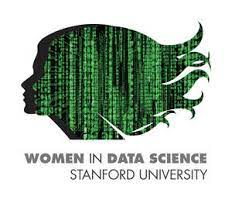

The Women in Data Science (WiDS) initiative aims to inspire and educate data scientists worldwide, regardless of gender, and to support women in the field. 

The WiDS Datathon is a data focused hackathon organized as a part of Women in Data Science Conference at Stanford University. The WiDS Datathon 2022 will focus on an important way to mitigate the effects of climate change - improving building energy efficiency through forecasting usage. Participants will examine the climate change from different perspectives, explore one dataset among several, spanning sectors including healthcare, energy and environmental protection.

### Research Tracks and Data
Participants must choose one of following three tracks to explore:
* Climate Change AI: Fine grained building energy usage data
* MIT Critical Data: CDC county level COVID data
* US Environmental Protection Agency (EPA): weather, air pollutant, and census data


We choose to work with Climate Change AI track; gas consumption from individual buildings in France. The dataset contains ~50K observations, individual building level gas use in 2019, individual buildings footprints and attributes and relevant local weather data. It was created by merging three datasets. Only residential multi-family buildings were selected.

Research questions that could be examined using this dataset include:
* Generalization questions: for example, how well can we predict energy use across France?
* Explainability/pattern recognition questions: for example, what are the main observed drivers of energy consumption?
* Scenario questions: for example how could energy use change if…?



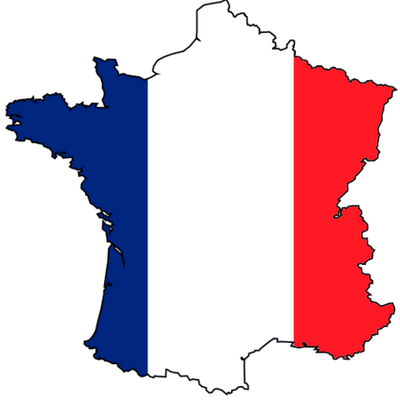



# 2 Imports<a id='2_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='gray'
import missingno as msno
from ipynb.fs.full.auxiliary_functions import footprint_area

# 3 Files<a id='3_Files'></a>

In [2]:
ccai = pd.read_csv('../Unit 20/Data/ccai.csv')
ccai.head(3)

,id,geometry,address,city_name,consumption,delivery_points,coords_eobs,qq_dict,height,type,age,floors,alt_prec,wall_mat,roof_mat
0,BATIMENT0000000267007025,"POLYGON ((831362.2 6287883.7, 831358.5 6287883...",20 RUE DES ARENES,ARLES,73.40591,10,"(43.6498605764, 4.649860372400003)","{1: 2592.0, 2: 2067.0, 3: 3237.0, 4: 4076.0, 5...",16.2,Indifférencié,NaN,NaN,1.0,NaN,NaN
1,BATIMENT0000000296359233,"POLYGON ((865664.7 6324289.7, 865661.4 6324287...",215 AVENUE RENE CHAR,PERNES-LES-FONTAINES,141.82340,21,"(43.949860575200006, 5.049860370800005)","{1: 2455.0, 2: 1814.0, 3: 2851.0, 4: 3557.0, 5...",4.3,Indifférencié,NaN,NaN,1.0,NaN,NaN
2,BATIMENT0000002206959400,"POLYGON ((853561.7 6321230.3, 853566 6321226.6...",180 RUE DU GRAND PLANTIER,VEDÈNE,162.46720,54,"(43.949860575200006, 4.949860371200003)","{1: 2457.0, 2: 1800.0, 3: 2848.0, 4: 3558.0, 5...",11.2,Indifférencié,NaN,NaN,1.5,NaN,NaN


# 4 Columns<a id='4_Columns'></a>

* `id`-- 
* `geometry`-- footprint polygon
* `consumption`-- yearly gas consumption in MWh
* `delivery_points`-- number of flats connected to the gas network
* `coords_eobs`-- coordinate of the closest climate observations
* `qq_dict`-- closest monthly global radiation observations
* `height`-- building height (ground to lowest roof point)
* `type`-- there are 7 building types
* `age`-- building age
* `floors`-- number of floors in the building
* `alt_prec`-- altimetric precision of the building height
* `wall_mat`-- wall material
* `roof_mat`-- roof material

# 5 Explore the Data<a id='5_Explore_the_Data'></a>

In [3]:
ccai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               55169 non-null  object 
 1   geometry         55169 non-null  object 
 2   address          55169 non-null  object 
 3   city_name        55169 non-null  object 
 4   consumption      55169 non-null  float64
 5   delivery_points  55169 non-null  int64  
 6   coords_eobs      55169 non-null  object 
 7   qq_dict          55169 non-null  object 
 8   height           54930 non-null  float64
 9   type             55169 non-null  object 
 10  age              39260 non-null  object 
 11  floors           43552 non-null  float64
 12  alt_prec         55169 non-null  float64
 13  wall_mat         41922 non-null  float64
 14  roof_mat         41921 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 6.3+ MB


<AxesSubplot:>

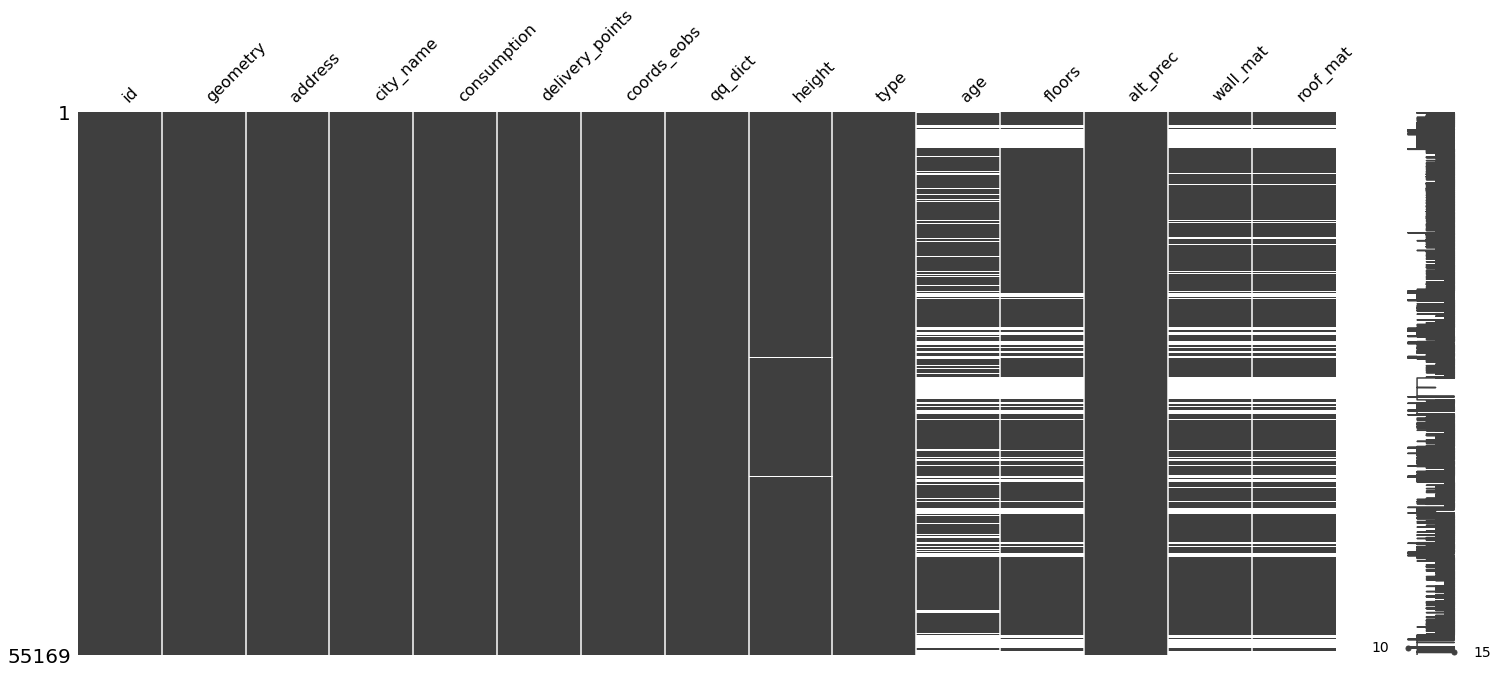

In [4]:
msno.matrix(ccai)

In [5]:
ccai.duplicated(subset=['id']).sum()

12623

In [6]:
ccai.nunique()

id                 42546
geometry           42546
address            44052
city_name           1383
consumption        46326
delivery_points      127
coords_eobs          854
qq_dict              824
height               558
type                   7
age                  252
floors                25
alt_prec               4
wall_mat              50
roof_mat              30
dtype: int64

In [7]:
ccai['alt_prec'].unique()

array([1.000e+00, 1.500e+00, 2.500e+00, 9.999e+03])

We observe the following: 
* `id`: There are 12623 duplicated ids (even though the records are unique as rows), this column should be dropped for that reason
* `height`: There are 239 missing values
* `type`: There are 7 building types
* `age`: There are 15909 missing values
* `floors`: There are 11617 missing values
* `alt_prec`: There are only 4 unique values; 1, 1.5, 2 and 9999
* `wall_mat`: There are 13247 missing values
* `roof_mat`: There are 13248 missing values

## 5.1 Gas consumption across  the country<a id='5.1_across_country'></a> 

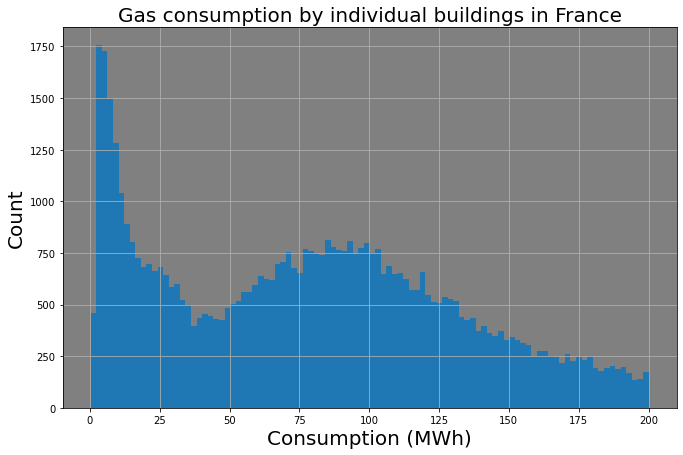

In [8]:
plt.figure(figsize=(11,7))
ccai.consumption.hist(bins=100)
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Gas consumption by individual buildings in France', fontsize=20)
plt.show()

## 5.2 Gas consumption in the four most populated cities<a id='5.2_populated_cities'></a> 

We examine consumption in the four largest cities of France:
* Paris
* Marseille
* Lyon
* Toulouse

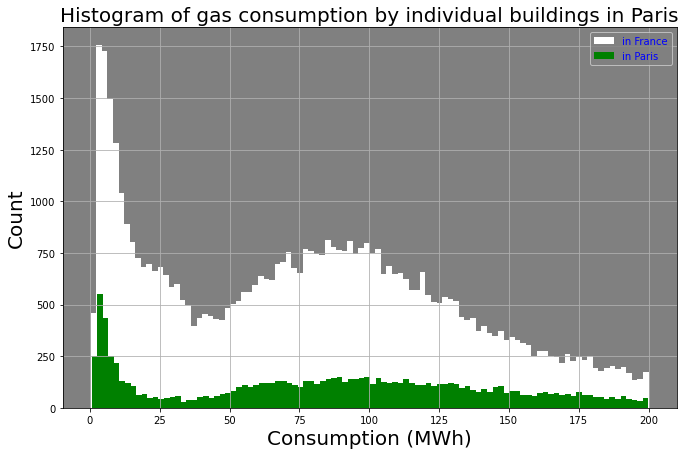

In [9]:
plt.figure(figsize=(11,7))
ccai.consumption.hist(bins=100, color='white', label='in France')
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'PARIS' in city])].hist(bins=100, color='green', label='in Paris')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Paris', fontsize=20)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("blue")
plt.show()

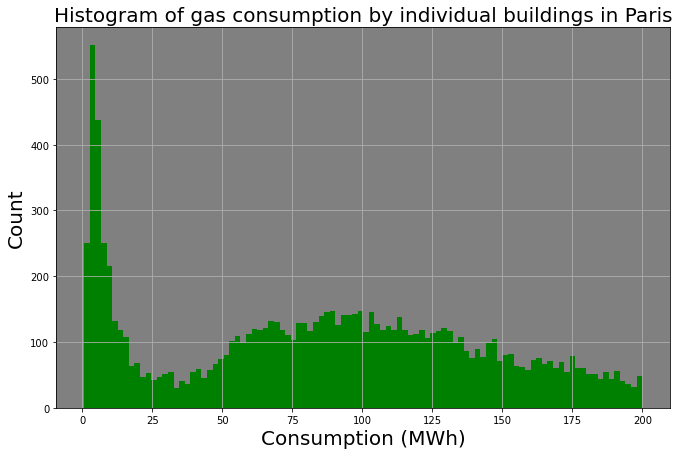

In [10]:
plt.figure(figsize=(11,7))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'PARIS' in city])].hist(bins=100, color='green')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Paris', fontsize=20)
plt.show()

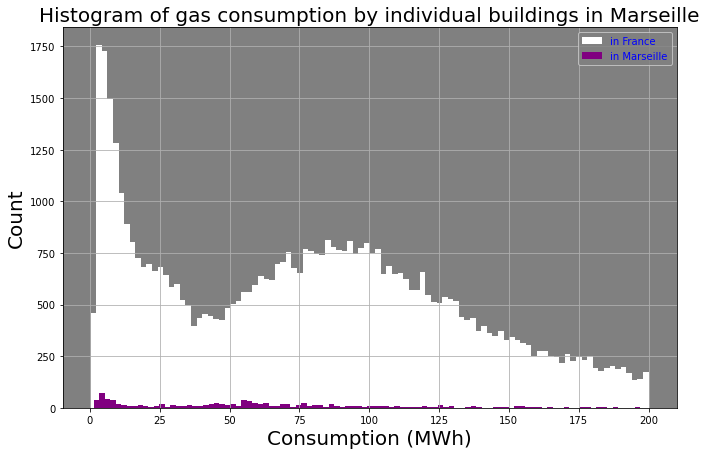

In [11]:
plt.figure(figsize=(11,7))
ccai.consumption.hist(bins=100, color='white', label='in France')
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'MARSEILLE' in city])].hist(bins=100, color='purple', label='in Marseille')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Marseille', fontsize=20)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("blue")
plt.show()

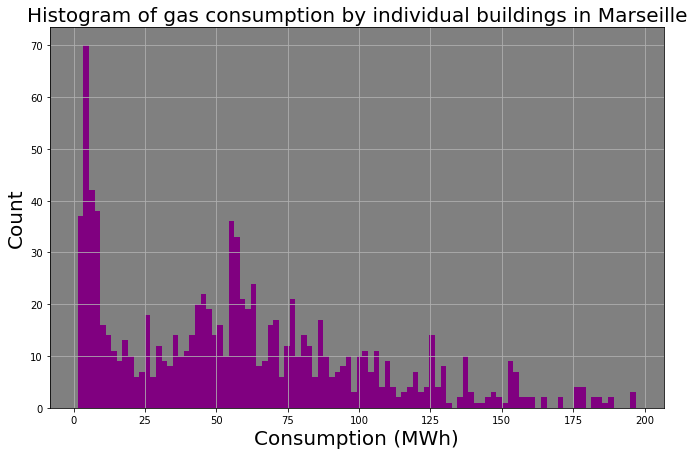

In [12]:
plt.figure(figsize=(11,7))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'MARSEILLE' in city])].hist(bins=100, color='purple')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Marseille', fontsize=20)
plt.show()

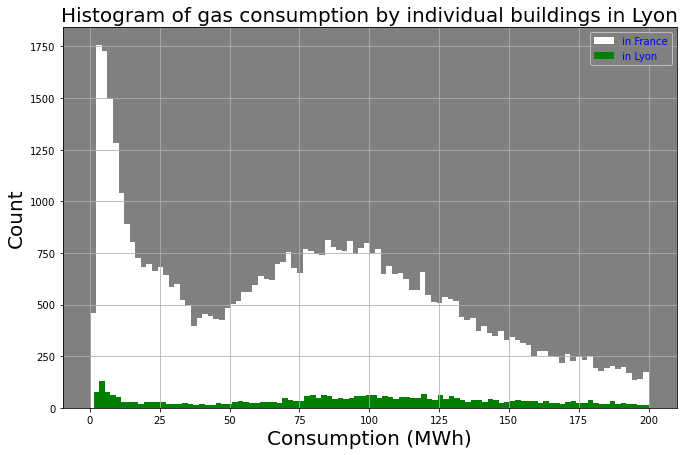

In [13]:
plt.figure(figsize=(11,7))
ccai.consumption.hist(bins=100, color='white', label='in France')
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'LYON' in city])].hist(bins=100, color='green', label='in Lyon')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Lyon', fontsize=20)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("blue")
plt.show()

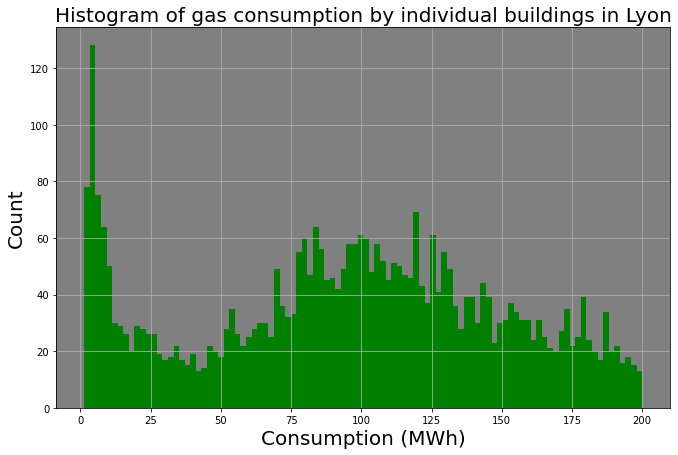

In [14]:
plt.figure(figsize=(11,7))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'LYON' in city])].hist(bins=100, color='green')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Lyon', fontsize=20)
plt.show()

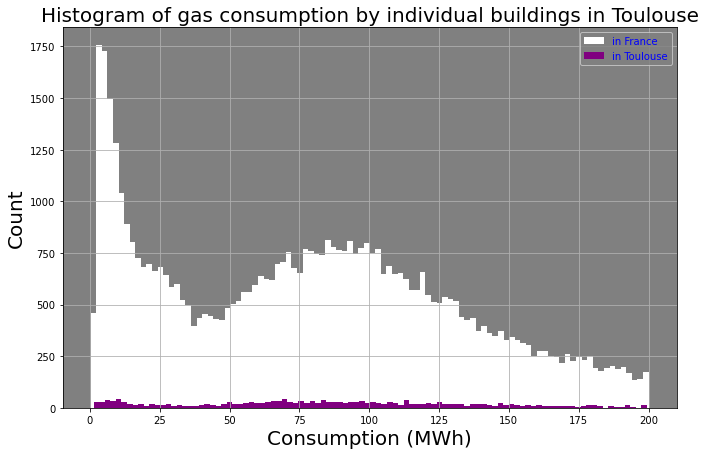

In [15]:
plt.figure(figsize=(11,7))
ccai.consumption.hist(bins=100, color='white', label='in France')
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'TOULOUSE' in city])].hist(bins=100, color='purple', label='in Toulouse')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Toulouse', fontsize=20)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("blue")
plt.show()

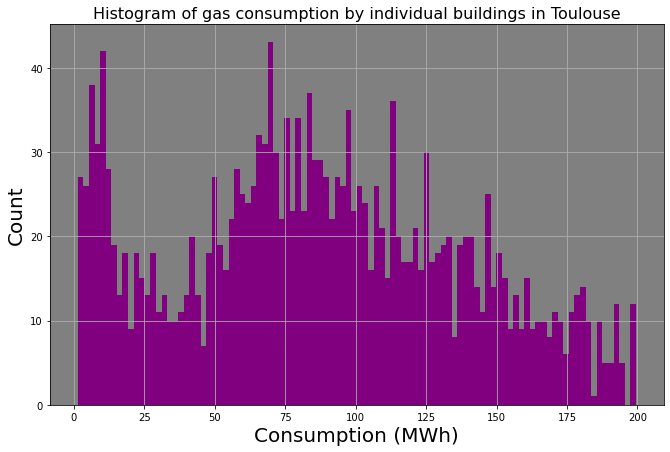

In [16]:
plt.figure(figsize=(11,7))
ccai.consumption[ccai.city_name.isin([city for city in ccai.city_name if 'TOULOUSE' in city])].hist(bins=100, color='purple')
plt.xlabel('Consumption (MWh)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of gas consumption by individual buildings in Toulouse', fontsize=16)
plt.show()

## 5.3 Mean consumption of each city<a id='5.3_each_city'></a> 

In [17]:
ccai.consumption.mean()

78.06048175841553

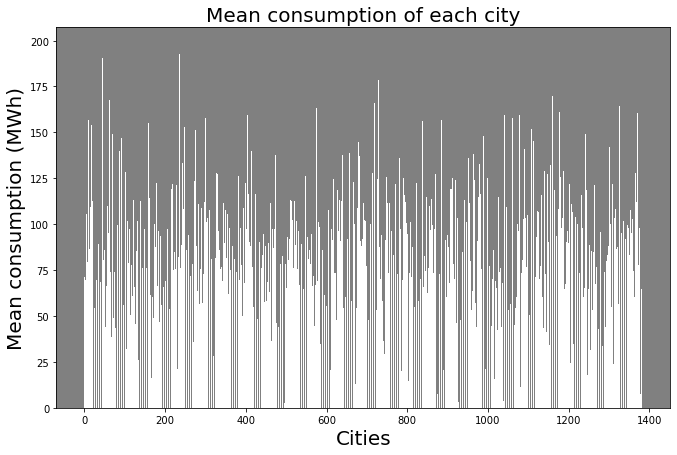

In [18]:
plt.figure(figsize=(11,7))
plt.bar(range(ccai.city_name.nunique()), ccai.groupby('city_name').consumption.mean().tolist(), color='white')
plt.xlabel('Cities', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption of each city', fontsize=20)
plt.show()

## 5.4 Consumption in relation to the building type <a id='5.4_building_type'></a> 

In [19]:
ccai.type.unique()

array(['Indifférencié', 'Résidentiel', 'Commercial et services',
       'Industriel', 'Annexe', 'Sportif', 'Religieux'], dtype=object)

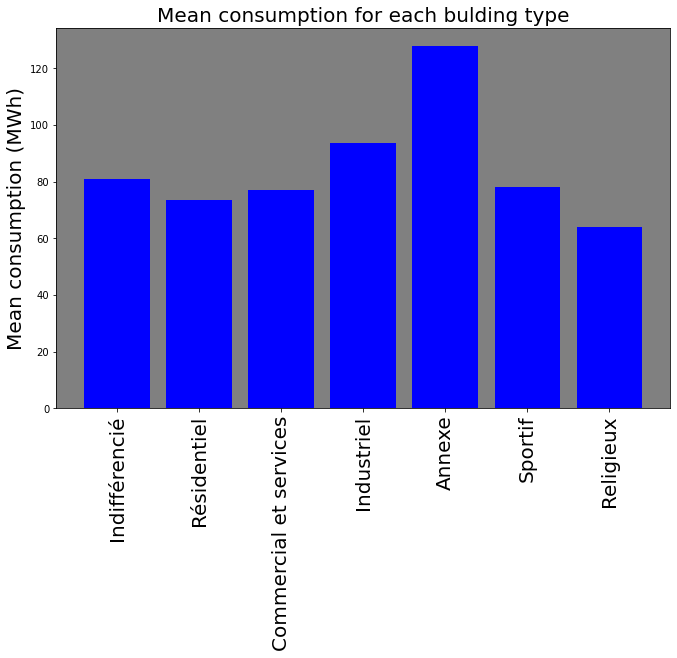

In [20]:
plt.figure(figsize=(11,7))
plt.bar(ccai.type.unique().tolist(), ccai.groupby('type').consumption.mean().tolist(), color='blue')
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption for each bulding type', fontsize=20)
plt.show()

## 5.5 Consumption in relation to the number of floors<a id='5.5_number_floors'></a> 

In [21]:
np.sort(ccai.floors.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 26., 36., nan])

In [22]:
ccai.floors = ccai.floors.fillna(37)

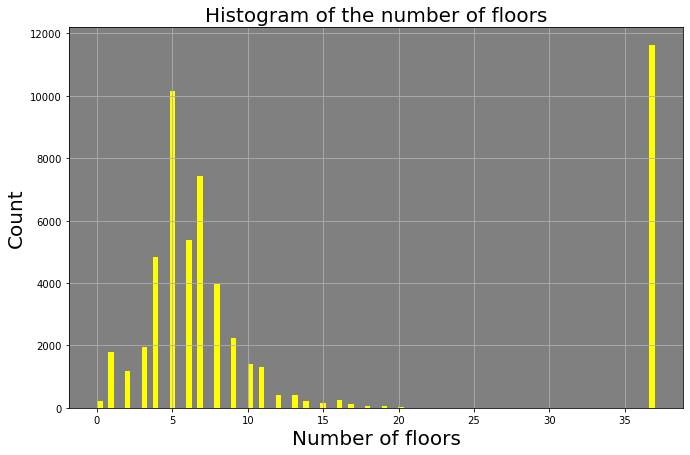

In [23]:
plt.figure(figsize=(11,7))
ccai.floors.hist(bins=100, color='yellow')
plt.xlabel('Number of floors', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of the number of floors', fontsize=20)
plt.show()

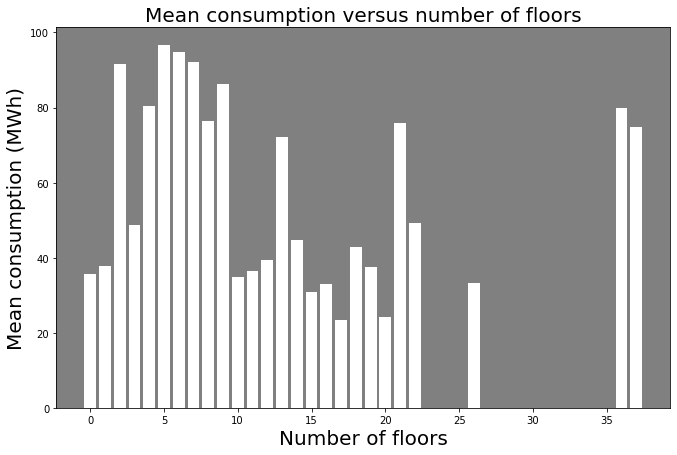

In [24]:
plt.figure(figsize=(11,7))
plt.bar(ccai.floors.unique().tolist(), ccai.groupby('floors').consumption.mean().tolist(), color='white')
plt.xlabel('Number of floors', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus number of floors', fontsize=20)
plt.show()

## 5.6 Consumption in relation to the building footprint area <a id='5.6_footprint_area'></a> 

In [25]:
ccai['area'] = ccai.geometry.apply(lambda x: footprint_area(x)) 
# we write a function called footprint_area() to calculate the footprint area of each building.

In [26]:
ccai['area'] = ccai.geometry.apply(lambda x: footprint_area(x))

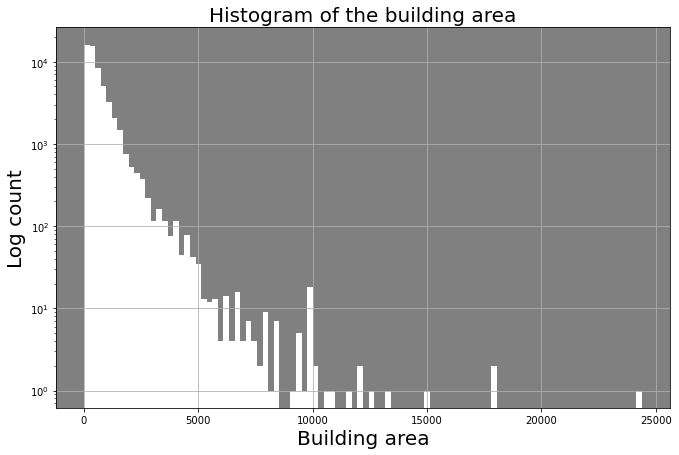

In [27]:
plt.figure(figsize=(11,7))
ccai.area.hist(bins=100, color='white')
plt.xlabel('Building area', fontsize=20)
plt.ylabel('Log count', fontsize=20)
plt.yscale('log')
plt.title('Histogram of the building area', fontsize=20)
plt.show()

## 5.7 Consumption in relation to the building height <a id='5.7_building_height'></a> 

In [28]:
ccai.height = ccai.height.fillna(-1)

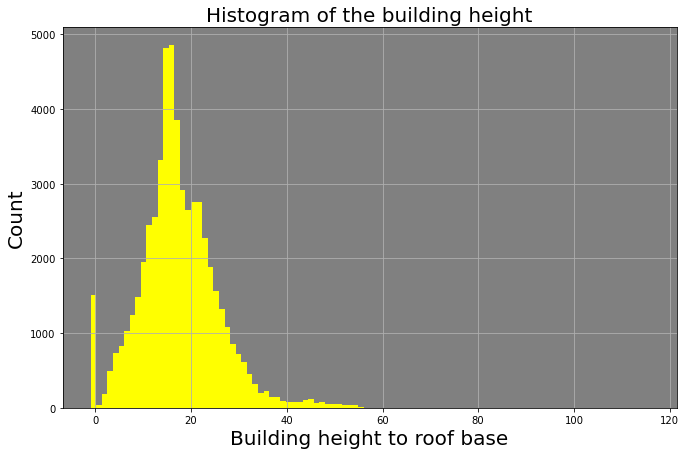

In [29]:
plt.figure(figsize=(11,7))
ccai.height.hist(bins=100, color='yellow')
plt.xlabel('Building height to roof base', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of the building height', fontsize=20)
plt.show()

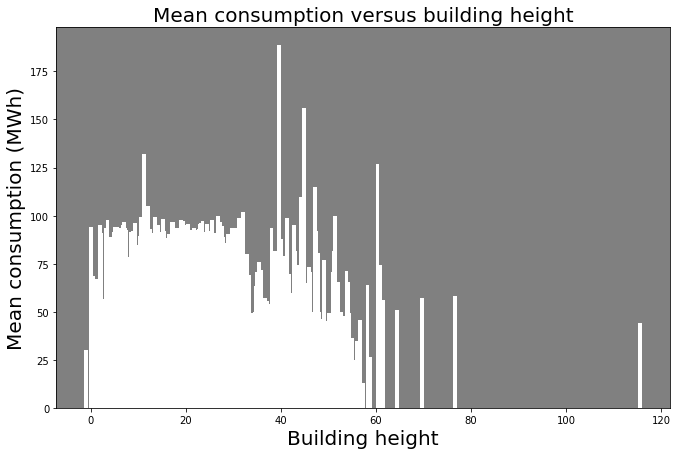

In [30]:
plt.figure(figsize=(11,7))
plt.bar(ccai.height.unique().tolist(), ccai.groupby('height').consumption.mean().tolist(), color='white')
plt.xlabel('Building height', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus building height', fontsize=20)
plt.show()

## 5.8 Consumption in relation to the building volume <a id='5.8_building_volume'></a> 

In [31]:
ccai['volume'] = ccai.height * ccai.area

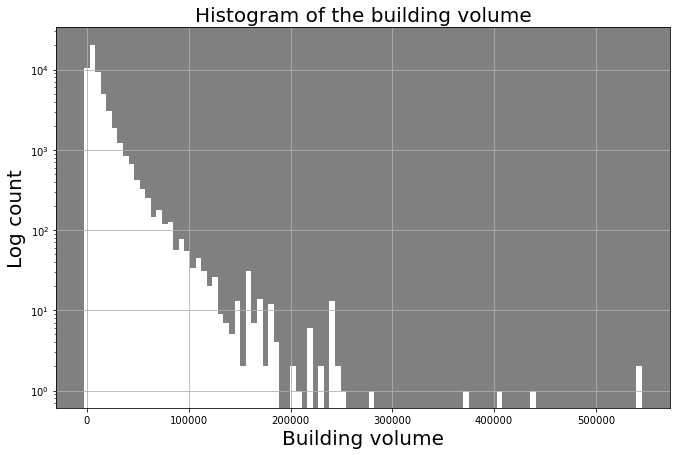

In [46]:
plt.figure(figsize=(11,7))
ccai.volume.hist(bins=100, color='white')
plt.xlabel('Building volume', fontsize=20)
plt.ylabel('Log count', fontsize=20)
plt.yscale('log')
plt.title('Histogram of the building volume', fontsize=20)
plt.show()

In [33]:
# Define 50 categories in the building volume
ccai['volume_cut'] = pd.qcut(ccai.volume, 50, labels=range(50)).astype('category')

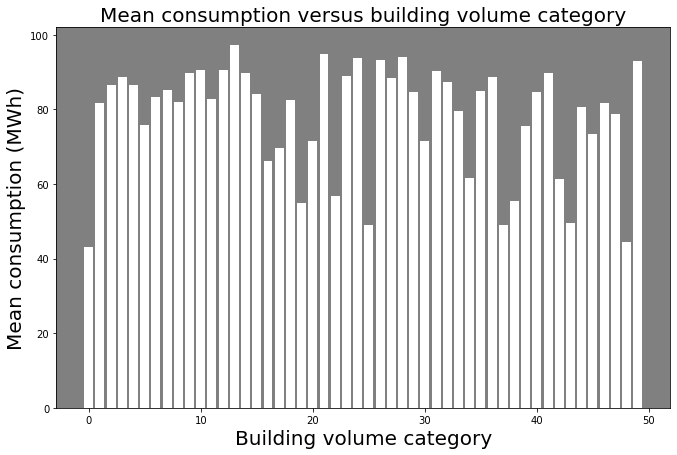

In [34]:
plt.figure(figsize=(11,7))
plt.bar(ccai.volume_cut.unique().tolist(), ccai.groupby('volume_cut').consumption.mean().tolist(), color='white')
plt.xlabel('Building volume category', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus building volume category', fontsize=20)
plt.show()

## 5.9 Consumption in relation to the number of flats in the building connected to gas network <a id='5.9_gas_network'></a> 

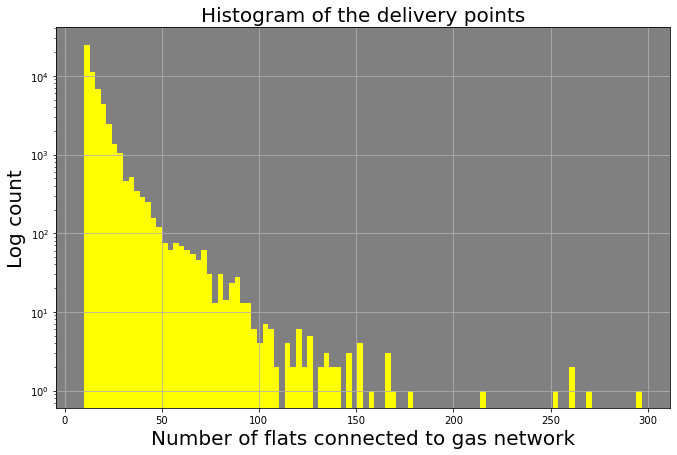

In [35]:
plt.figure(figsize=(11,7))
ccai.delivery_points.hist(bins=100, color='yellow')
plt.xlabel('Number of flats connected to gas network', fontsize=20)
plt.ylabel('Log count', fontsize=20)
plt.yscale('log')
plt.title('Histogram of the delivery points', fontsize=20)
plt.show()

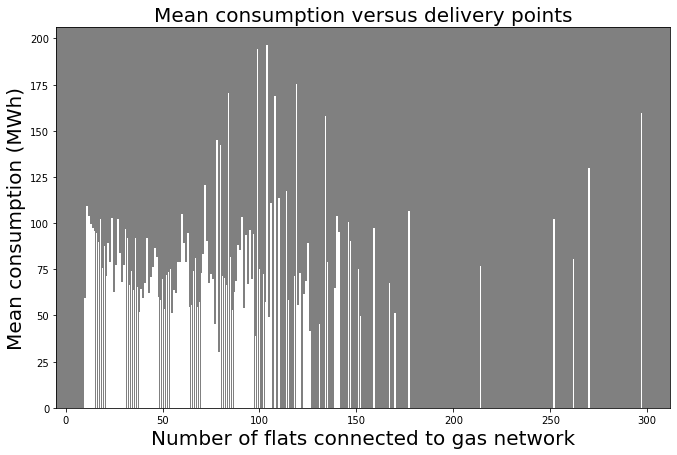

In [47]:
plt.figure(figsize=(11,7))
plt.bar(ccai.delivery_points.unique().tolist(), ccai.groupby('delivery_points').consumption.mean().tolist(), color='white')
plt.xlabel('Number of flats connected to gas network', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus delivery points', fontsize=20)
plt.show()

## 5.10 The consumption in relation to the wall and roof material <a id='5.10_roof_material'></a> 

In [37]:
ccai.wall_mat = ccai.wall_mat.fillna(-1)
ccai.roof_mat = ccai.roof_mat.fillna(-1)

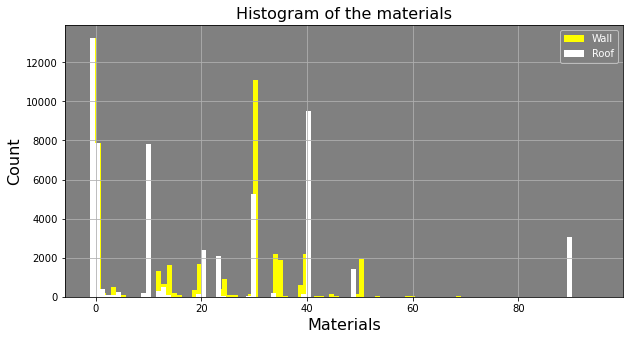

In [38]:
plt.figure(figsize=(10,5))
ccai.wall_mat.hist(bins=100, color='yellow', label='Wall')
ccai.roof_mat.hist(bins=100, color='white', label='Roof')
plt.xlabel('Materials', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Histogram of the materials', fontsize=16)
leg = plt.legend()
for text in leg.get_texts():
    text.set_color("white")
plt.show()

In [39]:
ccai.wall_mat.unique()

array([-1.,  0., 30., 10., 35., 23., 20., 50., 45.,  3., 14., 15.,  2.,
        5., 16., 13., 34., 59., 19., 12., 29., 24., 25., 39., 51., 53.,
       90., 40., 60.,  1.,  9., 42., 46., 26., 49.,  6., 36.,  4., 43.,
       41., 69., 56., 91., 31., 21., 94., 54., 52., 32., 93., 95.])

In [40]:
ccai.groupby('wall_mat').consumption.mean()

wall_mat
-1.0      75.674318
 0.0      93.927124
 1.0      89.390753
 2.0      97.351276
 3.0     108.473748
 4.0      84.900637
 5.0      82.650680
 6.0      51.905275
 9.0      96.273083
 10.0     97.044755
 12.0    107.455769
 13.0     66.302708
 14.0     98.120407
 15.0     92.088259
 16.0    105.713360
 19.0     96.625313
 20.0     92.384997
 21.0     89.508011
 23.0     79.113773
 24.0     73.598089
 25.0     87.869963
 26.0     98.139101
 29.0    107.097329
 30.0     57.633412
 31.0     28.498537
 32.0    101.106125
 34.0     61.619032
 35.0     65.489257
 36.0     61.048019
 39.0     54.947551
 40.0     81.151445
 41.0     96.614274
 42.0     82.611734
 43.0     48.357099
 45.0     82.282114
 46.0     89.117118
 49.0     82.913558
 50.0     75.831261
 51.0     59.299567
 52.0     82.198277
 53.0     72.049891
 54.0     88.209152
 56.0     71.495301
 59.0     89.957804
 60.0     86.195596
 69.0     92.361998
 90.0     82.738181
 91.0     61.103314
 93.0    116.571660
 94.0     9

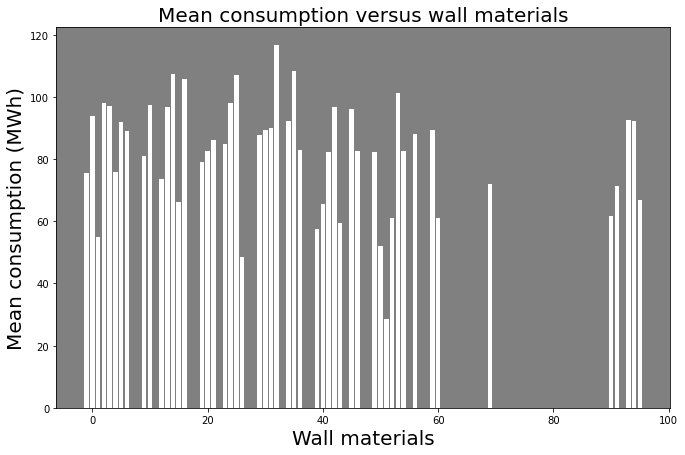

In [41]:
plt.figure(figsize=(11,7))
plt.bar(ccai.wall_mat.unique().tolist(), ccai.groupby('wall_mat').consumption.mean().tolist(), color='white')
plt.xlabel('Wall materials', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus wall materials', fontsize=20)
plt.show()

In [42]:
ccai.roof_mat.unique()

array([-1.,  0., 40., 10., 90., 14.,  4.,  1., 13., 30., 49., 29., 34.,
       23., 19., 20., 93.,  3.,  9., 39.,  2., 24., 12., 32., 41., 92.,
       94., 91., 43., 31., 21.])

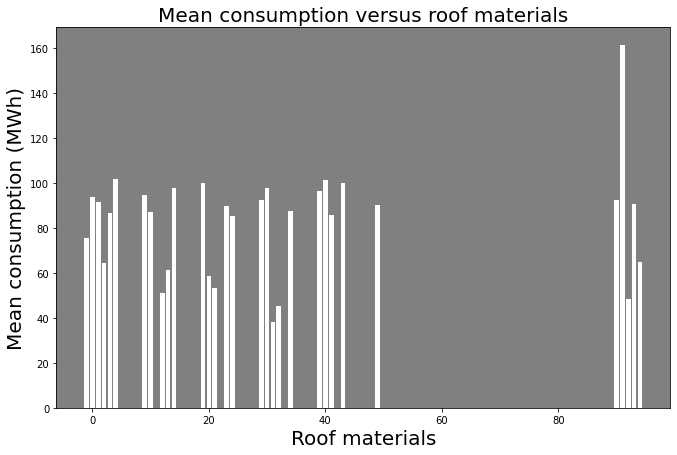

In [43]:
plt.figure(figsize=(11,7))
plt.bar(ccai.roof_mat.unique().tolist(), ccai.groupby('roof_mat').consumption.mean().tolist(), color='white')
plt.xlabel('Roof materials', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus roof materials', fontsize=20)
plt.show()

## 5.11 The consumption in relation to the building age <a id='5.11_building_age'></a> 

In [44]:
ccai.age = ccai.age.fillna('1000-00-00')
ccai['year'] = ccai.age.apply(lambda x: int(x.split('-')[0]))

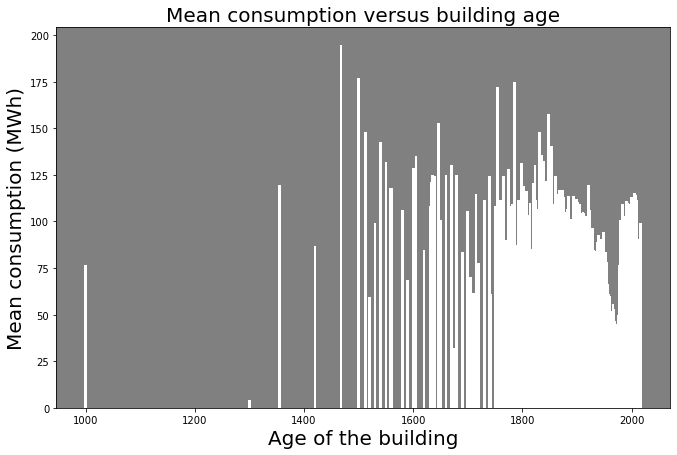

In [45]:
plt.figure(figsize=(11,7))
plt.bar(ccai.year.sort_values().unique(), ccai.groupby('age').consumption.mean().tolist(), color='white', width=5)
plt.xlabel('Age of the building', fontsize=20)
plt.ylabel('Mean consumption (MWh)', fontsize=20)
plt.title('Mean consumption versus building age', fontsize=20)
plt.show()

# 6 Conclusions<a id='6_conclusions'></a> 


* Building type 'Annexe' spent the most amount of gas by far in comparison to others. In contrast, building type 'Religieux' spent the least amount of gas. 
* Gas consumption is approximately the same for all building height values.
* We can observe that gas comsumption does not increase with increasing number of floors.
* Older buildings tend to spent more gas on average. 
* Roof material 91 spent the most amount of gas on average.
* Wall material 93 spent the most amount of gas on average.